<a href="https://colab.research.google.com/github/hanasgnt/PCVK_2024_14/blob/main/week7_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama  : Hana Sugianto**

**NIM   : 2241720102**

**Kelas : 3E**

# **Praktikum**

Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa menggunakan library atau metode konvolusi dari OpenCV.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [ ]:
# buat fungsi konvolusi

def convolution2d(image, kernel, stride, padding):
  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK_2024/image/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [ ]:
# kernel yang digunakan - image sharpen
kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

In [ ]:
convolution2d(img_gray, kernel_sharpen, 1,2)

array([[   0.,  -47.,  -42., ..., -134., -131.,    0.],
       [ -47.,  145.,   75., ...,  273.,  385., -131.],
       [ -48.,  105.,   47., ...,  131.,  287., -136.],
       ...,
       [  -9.,   11.,   15., ...,   98.,  227., -102.],
       [ -18.,   64.,   40., ...,  130.,  305.,  -96.],
       [   0.,  -18.,  -17., ...,  -73.,  -96.,    0.]], dtype=float32)

Buat image filter untuk average filter, low pass filter, high pass filter, dan beberapa filter berikut

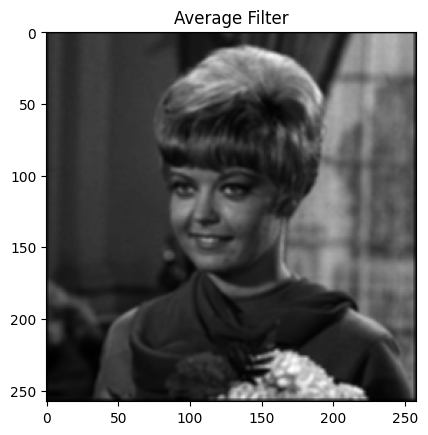

In [ ]:
kernel_average = np.array([[1, 1, 1],
                           [1, 1, 1],
                           [1, 1, 1]])/9

plt.title('Average Filter')
result_avg = convolution2d(img_gray, kernel_average, 1, 2)
plt.imshow(result_avg, cmap='gray')
plt.show()

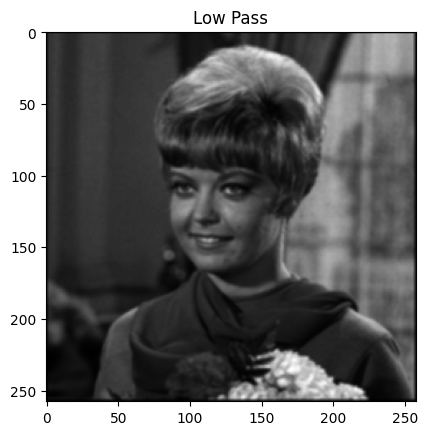

In [ ]:
kernel_low_pass = np.array([[1, 1, 1],
                           [1, 4, 1],
                           [1, 1, 1]])/12

plt.title('Low Pass')
result_low_pass = convolution2d(img_gray, kernel_low_pass, 1, 2)
plt.imshow(result_low_pass, cmap='gray')
plt.show()

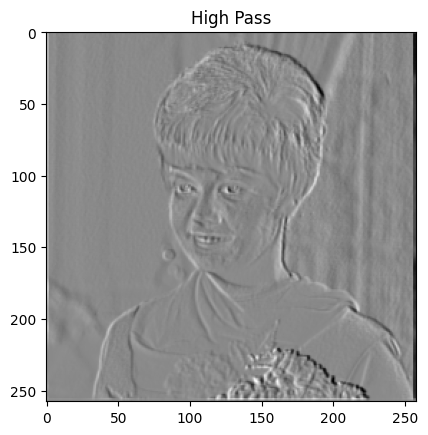

In [ ]:
kernel_high_pass = np.array([[-1, 0, 1],
                           [-1, 0, 3],
                           [-3, 0, 1]])

plt.title('High Pass')
result_high_pass = convolution2d(img_gray, kernel_high_pass, 1, 2)
plt.imshow(result_high_pass, cmap='gray')
plt.show()

		Sharpen



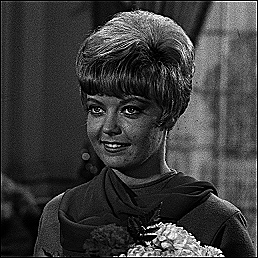

In [ ]:
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

print('\t\tSharpen\n')
result_sharpen = convolution2d(img_gray, kernel_sharpen, 1, 2)
cv2_imshow(result_sharpen)

		Emboss



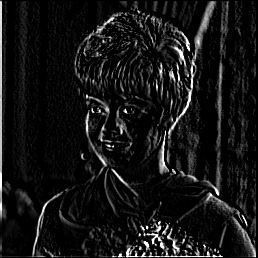

In [ ]:
kernel_emboss = np.array([[-2, -1, 0],
                           [-1, 1, 1],
                           [0, 1, 2]])

print('\t\tEmboss\n')
result_emboss = convolution2d(img_gray, kernel_high_pass, 1, 2)
cv2_imshow(result_emboss)

	Left Sobel Edge Detection



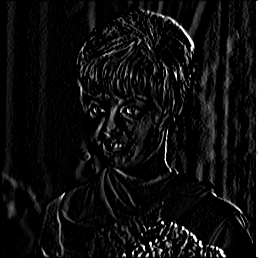

In [ ]:
kernel_left_sobel_edge_detection = np.array([[1, 0, -1],
                                            [2, 0, -2],
                                            [1, 0, -1]])

print('\tLeft Sobel Edge Detection\n')
result_left_sobel_edge_detection = convolution2d(img_gray, kernel_left_sobel_edge_detection, 1, 2)
cv2_imshow(result_left_sobel_edge_detection)

	Canny Edge Detection



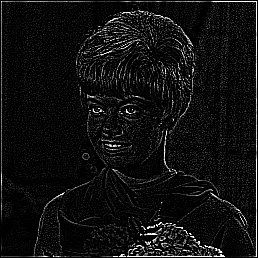

In [ ]:
kernel_canny_edge_detection = np.array([[-1, -1, -1],
                                        [-1, 8, -1],
                                        [-1, -1, -1]])

print('\tCanny Edge Detection\n')
result_canny_edge_detection = convolution2d(img_gray, kernel_canny_edge_detection, 1, 2)
cv2_imshow(result_canny_edge_detection)

	Prewitt Edge Detection



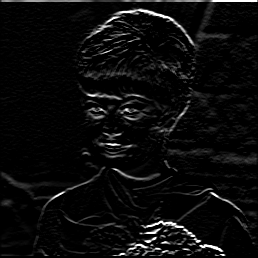

In [ ]:
kernel_prewitt_edge_detection = np.array([[-1, -1, -1],
                                          [0, 0, 0],
                                          [1, 1, 1]])

print('\tPrewitt Edge Detection\n')
result_prewitt_edge_detection = convolution2d(img_gray, kernel_prewitt_edge_detection, 1, 2)
cv2_imshow(result_prewitt_edge_detection)

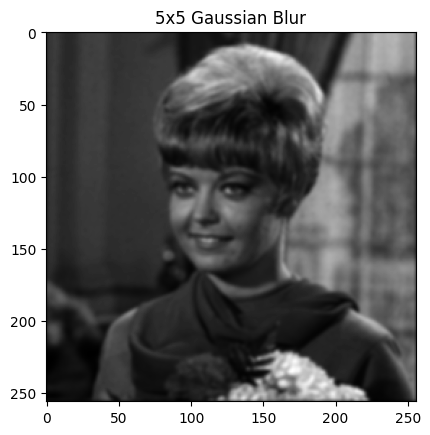

In [ ]:
kernel_5_gaussian_blur = np.array([[1, 4, 6, 4, 1],
                                   [4, 16, 24, 16, 4],
                                   [6, 24, 36, 24, 6],
                                   [4, 16, 24, 16, 4],
                                   [1, 4, 6, 4, 1]])/256

plt.title('5x5 Gaussian Blur')
result_5_gaussian_blur = convolution2d(img_gray, kernel_5_gaussian_blur, 1, 2)
plt.imshow(result_5_gaussian_blur, cmap='gray')
plt.show()

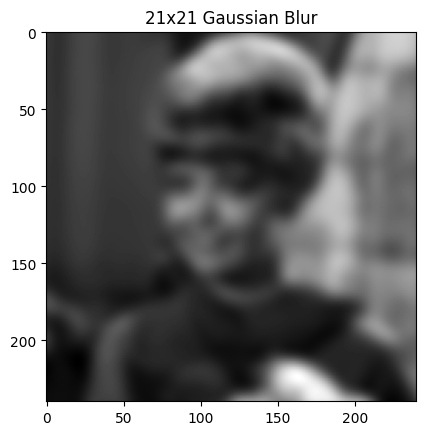

In [ ]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size,sigma)
gaussian_blur_21 = gaussian_kernel @ gaussian_kernel.transpose()

plt.title('21x21 Gaussian Blur')
result_21_gaussian_blur = convolution2d(img_gray,gaussian_blur_21,1,2)
plt.imshow(result_21_gaussian_blur, cmap='gray')
plt.show()

# **E. Tugas**

Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan operasi aritmatika sebagai teknik pendukung perbaikan citra KTP.

In [ ]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def adjust_brightness(image, value):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(hsv)
    v = np.clip(cv.add(v, value), 0, 255)
    hsv_merge = cv.merge((h, s, v))
    return cv.cvtColor(hsv_merge, cv.COLOR_HSV2BGR)

In [ ]:
sharpen_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

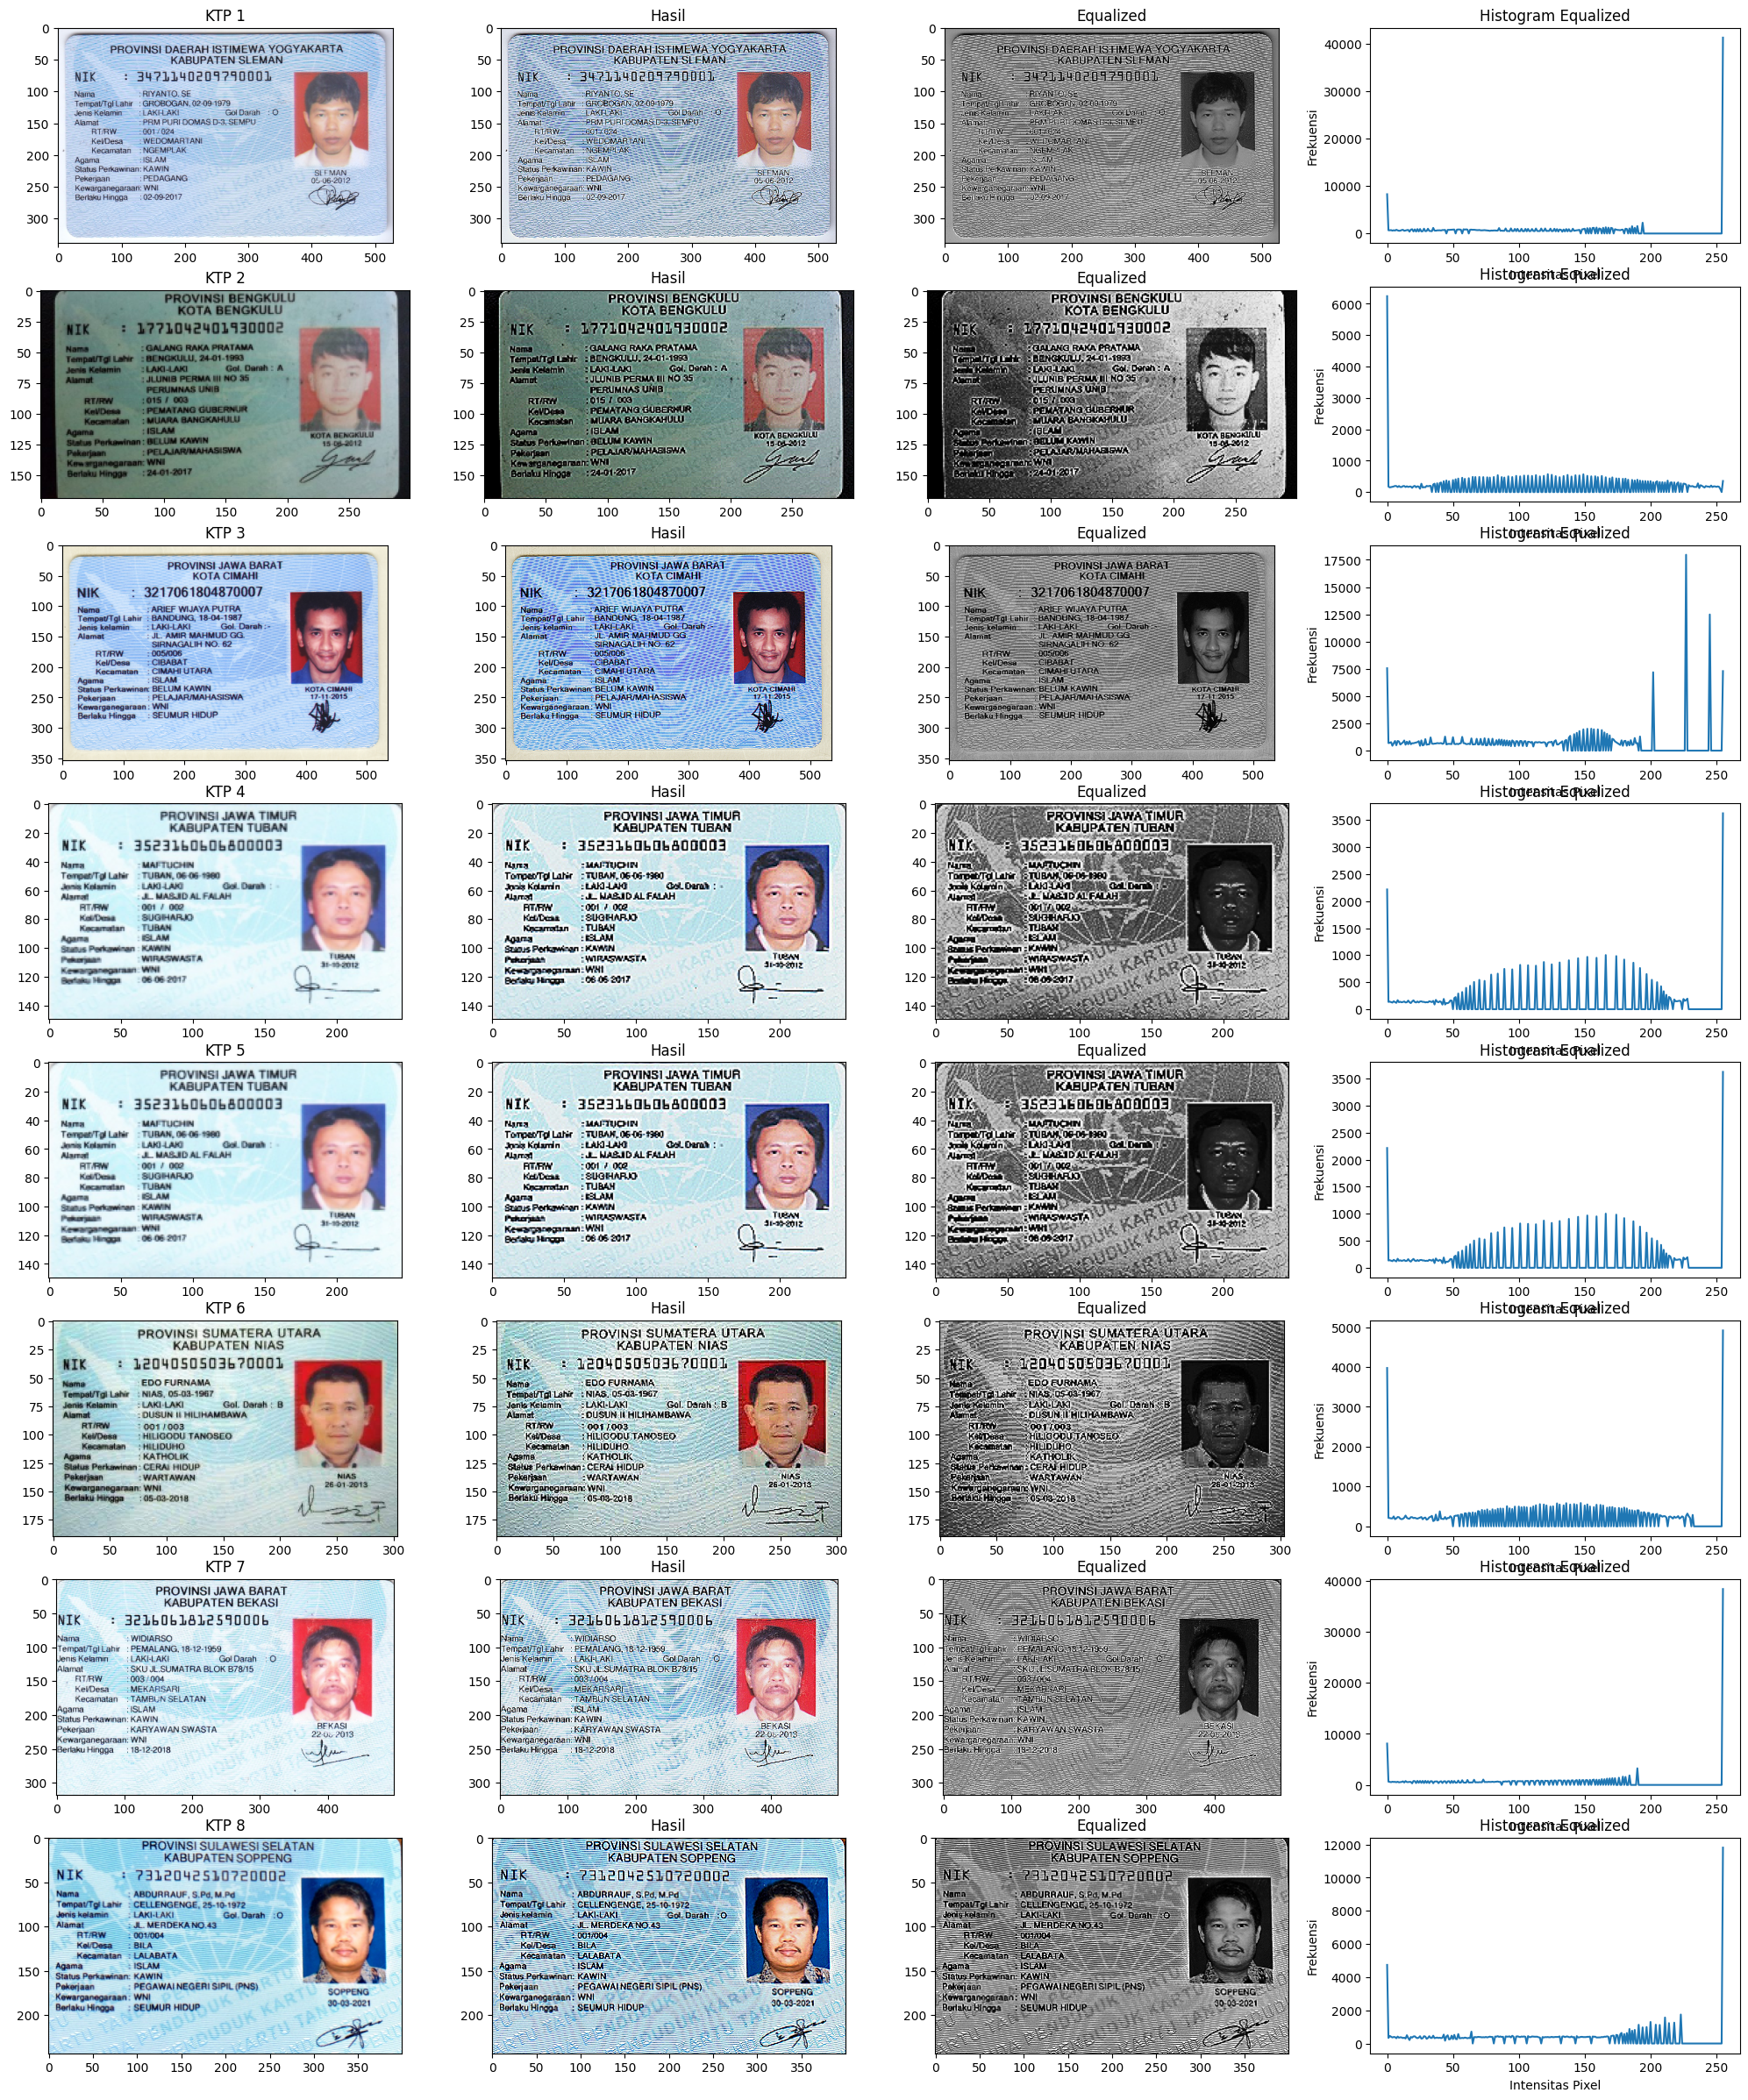

In [ ]:
image_directory = '/content/drive/MyDrive/PCVK_2024/KTP_More'
ktp_files = [f for f in os.listdir(image_directory) if 'ktp' in f.lower() and f.lower().endswith(('.png', '.jpg', '.jpeg'))]

fig, axs = plt.subplots(len(ktp_files), 4, figsize=(25, 30))

for i, ktp_file in enumerate(ktp_files):
    ktp_path = os.path.join('/content/drive/MyDrive/PCVK_2024/KTP_More', ktp_file)

    img_ktp = cv.imread(ktp_path)
    img_ktp_resized = cv.resize(img_ktp, (0, 0), fx=0.5, fy=0.5)

    brightness_adjusted = adjust_brightness(img_ktp_resized, -15)
    sharpened = cv.filter2D(brightness_adjusted, -1, sharpen_kernel)
    sharpened_gray = cv.cvtColor(sharpened, cv.COLOR_BGR2GRAY)

    equalized = cv.equalizeHist(sharpened_gray)
    equalized_color = cv.cvtColor(equalized, cv.COLOR_GRAY2BGR)
    hist_equalized = cv.calcHist([equalized], [0], None, [256], [0, 256])

    axs[i, 0].imshow(cv.cvtColor(img_ktp_resized, cv.COLOR_BGR2RGB))
    axs[i, 0].set_title(f'KTP {i+1}')

    axs[i, 1].imshow(cv.cvtColor(sharpened, cv.COLOR_BGR2RGB))
    axs[i, 1].set_title(f'Hasil')

    axs[i, 2].imshow(cv.cvtColor(equalized_color, cv.COLOR_BGR2RGB))
    axs[i, 2].set_title(f'Equalized')

    axs[i, 3].plot(hist_equalized)
    axs[i, 3].set_title(f'Histogram Equalized')
    axs[i, 3].set_xlabel('Intensitas Pixel')
    axs[i, 3].set_ylabel('Frekuensi')

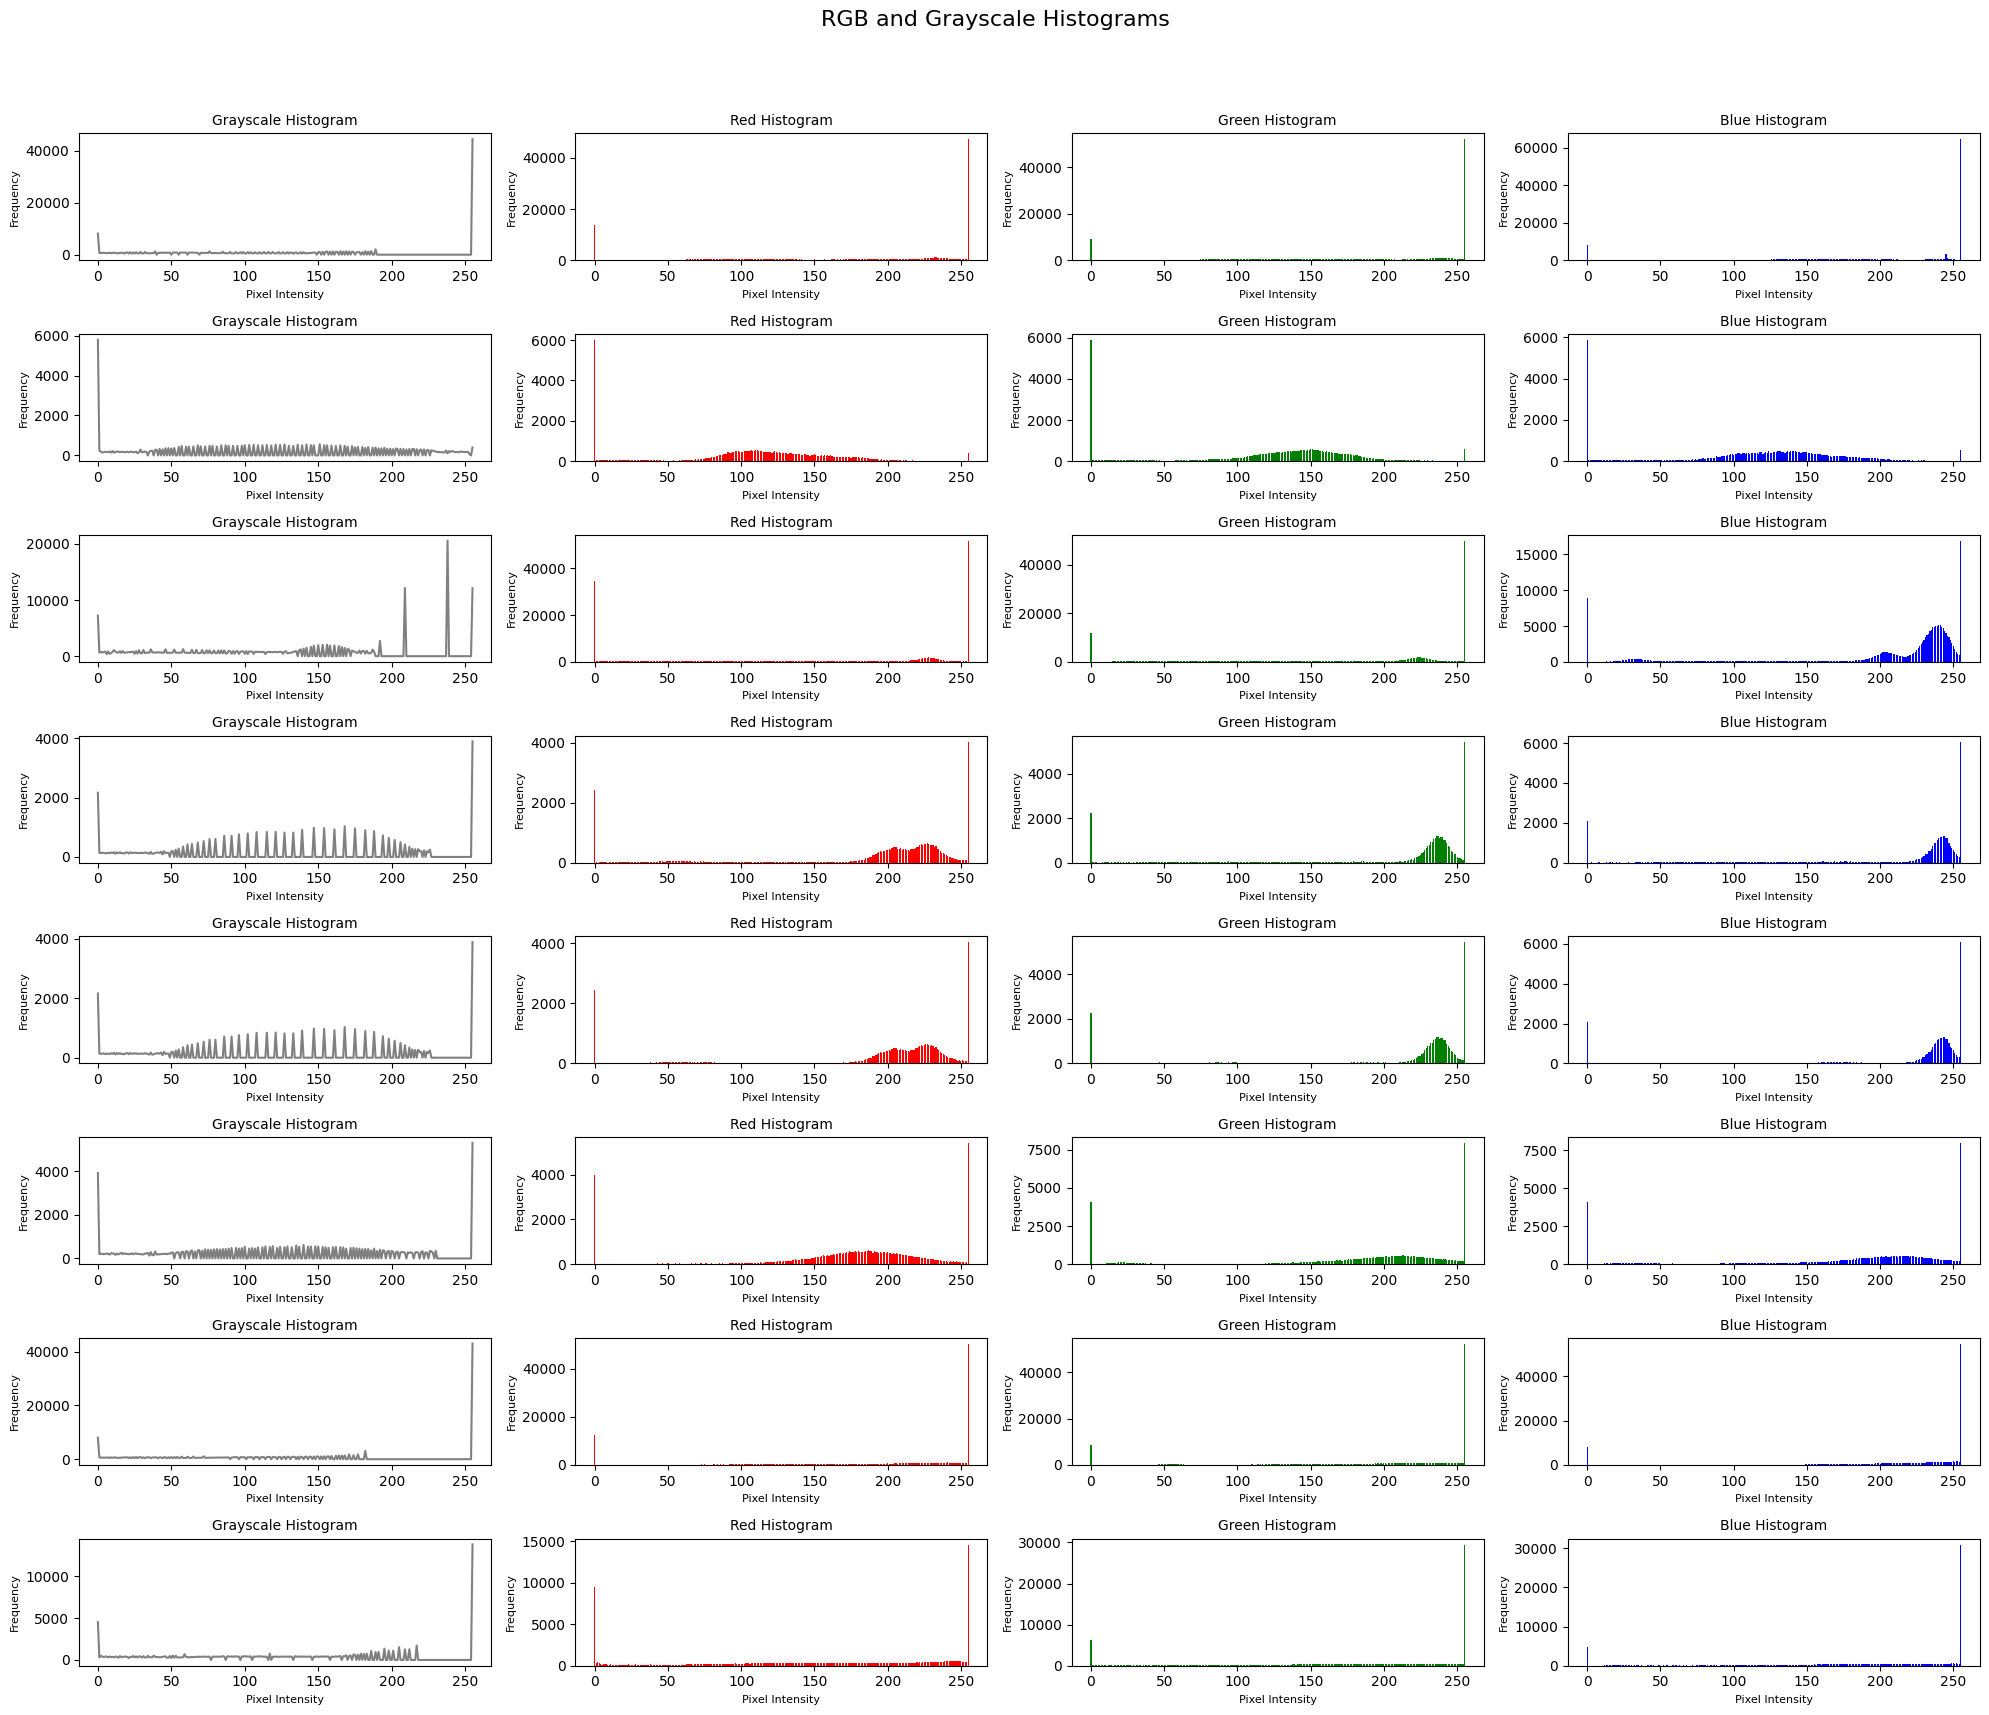

In [ ]:
fig, axs = plt.subplots(len(ktp_files), 4, figsize=(20, 18))

for i, ktp_file in enumerate(ktp_files):
    ktp_path = os.path.join(image_directory, ktp_file)

    img_ktp = cv.imread(ktp_path)
    img_ktp_resized = cv.resize(img_ktp, (0, 0), fx=0.5, fy=0.5)

    brightness_adjusted = adjust_brightness(img_ktp_resized, -10)
    sharpened = cv.filter2D(brightness_adjusted, -1, sharpen_kernel)
    sharpened_gray = cv.cvtColor(sharpened, cv.COLOR_BGR2GRAY)

    equalized = cv.equalizeHist(sharpened_gray)
    hist_equalized_gray = cv.calcHist([equalized], [0], None, [256], [0, 256])

    colors = ('b', 'g', 'r')
    hist_rgb = []
    for j, col in enumerate(colors):
        hist_rgb.append(cv.calcHist([sharpened], [j], None, [256], [0, 256]))

    # grayscale
    axs[i, 0].plot(hist_equalized_gray, color='gray')
    axs[i, 0].set_title('Grayscale Histogram', fontsize=10)
    axs[i, 0].set_xlabel('Pixel Intensity', fontsize=8)
    axs[i, 0].set_ylabel('Frequency', fontsize=8)

    # channel Red
    axs[i, 1].bar(range(256), hist_rgb[2].flatten(), color='red')
    axs[i, 1].set_title('Red Histogram', fontsize=10)
    axs[i, 1].set_xlabel('Pixel Intensity', fontsize=8)
    axs[i, 1].set_ylabel('Frequency', fontsize=8)

    # channel Green
    axs[i, 2].bar(range(256), hist_rgb[1].flatten(), color='green')
    axs[i, 2].set_title('Green Histogram', fontsize=10)
    axs[i, 2].set_xlabel('Pixel Intensity', fontsize=8)
    axs[i, 2].set_ylabel('Frequency', fontsize=8)

    # channel Blue
    axs[i, 3].bar(range(256), hist_rgb[0].flatten(), color='blue')
    axs[i, 3].set_title('Blue Histogram', fontsize=10)
    axs[i, 3].set_xlabel('Pixel Intensity', fontsize=8)
    axs[i, 3].set_ylabel('Frequency', fontsize=8)

fig.suptitle('RGB and Grayscale Histograms', fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()